In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

import acquire as acq
import prepare as prep

### Acquire
* Scenario: Working with store data to predict the sale_amount

In [2]:
#load my csv
df = pd.read_csv('ts_superstore.csv', skiprows=1, index_col=0)

In [3]:
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

### 1. Convert date column to datetime format.

In [5]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [6]:
df.sale_date[0]

'Tue, 01 Jan 2013'

In [7]:
df.sale_date = df.sale_date.str.strip()

In [8]:
df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [9]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')

In [10]:
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

### 2. Plot the distribution of sale_amount and item_price

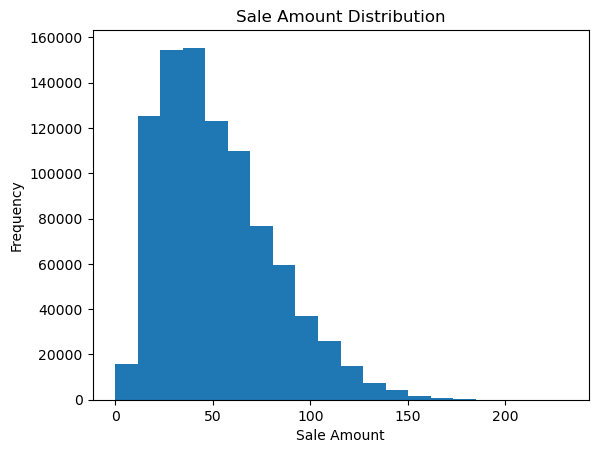

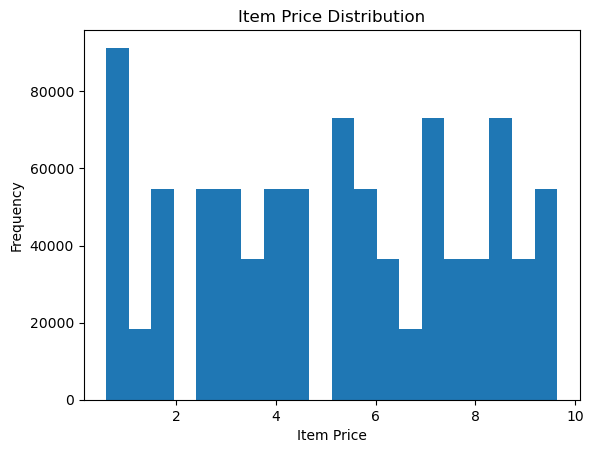

In [11]:
# Plot sale_amount distribution
plt.hist(df['sale_amount'], bins=20)
plt.title('Sale Amount Distribution')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

# Plot item_price distribution
plt.hist(df['item_price'], bins=20)
plt.title('Item Price Distribution')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

### 3. Set the index to be the datetime variable.

In [12]:
df = df.set_index('sale_date')

In [13]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [14]:
# sort the datetime index
df = df.sort_index()

### 4. Add a 'month' and 'day of week' column to your dataframe.

In [15]:
# Add month column
df['month'] = df.index.month

# Add day of week column
df['day_of_week'] = df.index.dayofweek

df.sample(5)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2015-04-25,30,46.0,535863,4,Petmate,30,Petmate Booda Bones Steak Bacon & Chicken Flav...,8.39,723503568678,723503568678,516 S Flores St,San Antonio,4,TX,78204,4,5
2016-07-03,13,100.0,227704,5,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,1520 Austin Hwy,San Antonio,5,TX,78218,7,6
2016-06-18,18,104.0,318989,5,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,1520 Austin Hwy,San Antonio,5,TX,78218,6,5
2015-08-31,5,20.0,75839,2,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036,9255 FM 471 West,San Antonio,2,TX,78251,8,0
2017-06-16,45,99.0,816024,7,Kelloggs,45,Kelloggs Disney Pixar Cars 2 Cereal,4.40,38000542237,38000542237,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,6,4


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [16]:
# Add sales_total column
df['sales_total'] = df['sale_amount'] * df['item_price']

df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,25.16


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

* See prepare.py file

In [ ]:
### df = prep.prep_ts_superstore(df)

## OPS Germany Data

In [2]:
germ_df = acq.get_germany_data()
germ_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [3]:
germ_df.index = pd.to_datetime(germ_df.index)

In [4]:
germ_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 2. Plot the distribution of each of your variables.

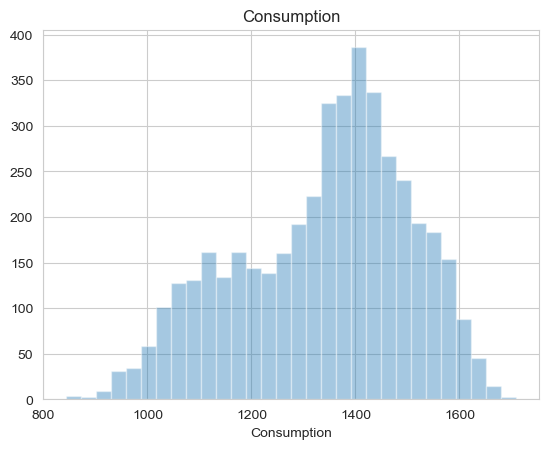

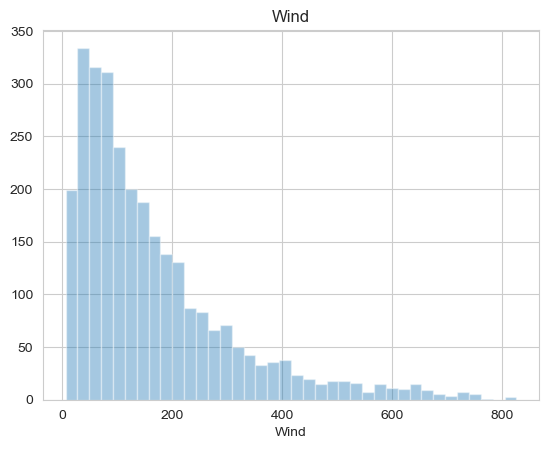

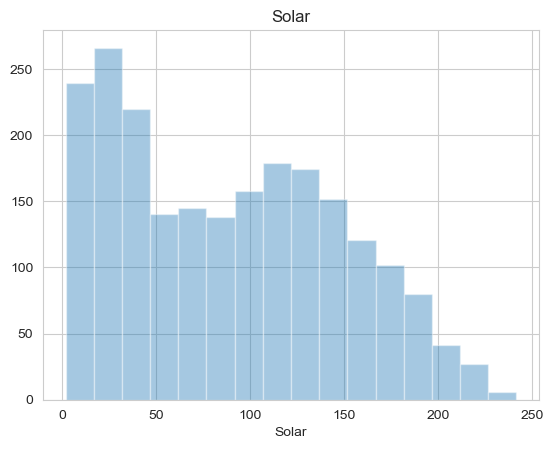

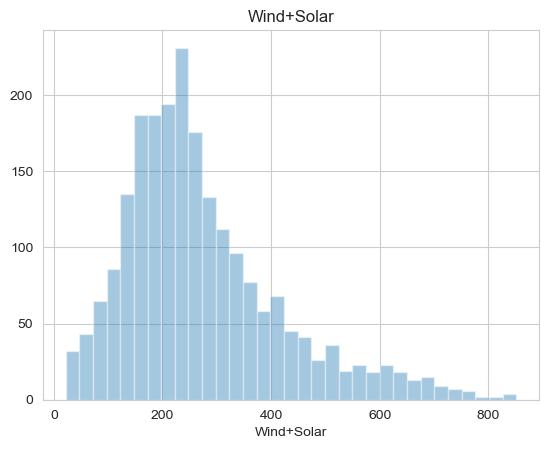

In [7]:
sns.set_style('whitegrid')

for col in germ_df.columns:
    sns.distplot(germ_df[col], kde=False)
    plt.title(col)
    plt.show()

### 3. Set the index to be the datetime variable.
* Already done in function get_germany_data()

### 4. Add a month and a year column to your dataframe.

In [8]:
germ_df['Month'] = germ_df.index.month
germ_df['Year'] = germ_df.index.year

In [9]:
germ_df.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2009-01-07,1472.995,NaN,NaN,NaN,1,2009
2009-11-18,1495.972,NaN,NaN,NaN,11,2009
2006-04-14,1118.396,NaN,NaN,NaN,4,2006
2013-07-24,1296.148,44.267,130.122,174.389,7,2013
2013-05-21,1278.721,73.061,114.522,187.583,5,2013


### 5. Fill any missing values.

In [10]:
germ_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   Month        4383 non-null   int64  
 5   Year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [11]:
germ_df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
Month             0
Year              0
dtype: int64

In [12]:
germ_df.sample(10)

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2013-05-07,1333.693,78.471,89.723,168.194,5,2013
2016-12-02,1585.450,305.234,33.942,339.176,12,2016
2012-02-19,1107.431,272.655,30.382,303.037,2,2012
2007-07-30,1338.610,NaN,NaN,NaN,7,2007
2014-01-25,1399.124,145.786,19.051,164.837,1,2014
2013-08-22,1277.201,22.690,164.176,186.866,8,2013
2013-01-14,1441.257,35.342,6.421,41.763,1,2013
2010-12-31,1199.812,117.325,NaN,NaN,12,2010
2010-08-31,1340.262,85.661,NaN,NaN,8,2010


In [13]:
germ_df['Wind'] = germ_df['Wind'].fillna(0)
germ_df['Solar'] = germ_df['Solar'].fillna(0)
germ_df.sample(10)

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-06-25,1028.869,0.000,0.000,NaN,6,2006
2016-05-13,1405.332,216.936,135.926,352.862,5,2016
2008-12-21,1129.423,0.000,0.000,NaN,12,2008
2009-09-08,1312.590,0.000,0.000,NaN,9,2009
2011-05-12,1415.283,52.967,0.000,NaN,5,2011
2015-07-28,1379.207,427.335,123.039,550.374,7,2015
2008-06-09,1355.783,0.000,0.000,NaN,6,2008
2007-08-16,1308.936,0.000,0.000,NaN,8,2007
2008-07-08,1370.670,0.000,0.000,NaN,7,2008


In [14]:
germ_df['Wind+Solar'] = germ_df['Wind+Solar'].fillna(germ_df['Wind'] + germ_df['Solar'])

In [15]:
germ_df.sample(20)

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2014-10-16,1480.270,61.472,40.676,102.148,10,2014
2006-06-25,1028.869,0.000,0.000,0.000,6,2006
2009-06-16,1264.813,0.000,0.000,0.000,6,2009
2008-06-25,1383.384,0.000,0.000,0.000,6,2008
2017-05-29,1414.019,55.642,208.706,264.348,5,2017
2013-06-13,1289.905,165.610,161.247,326.857,6,2013
2007-11-06,1591.535,0.000,0.000,0.000,11,2007
2006-03-06,1502.191,0.000,0.000,0.000,3,2006
2016-08-11,1336.473,193.681,145.304,338.985,8,2016


In [16]:
germ_df.columns = germ_df.columns.str.lower()

In [17]:
germ_df.head(1)

,consumption,wind,solar,wind+solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
### germ_df = prep.prep_germ_df(germ_df)